# Data structure operations: list, tuples and dicts, dataframes

In [ ]:
### create dict from 2 lists
keys = ['a', 'b', 'c']
values = [1, 2, 3]
dictionary = dict(zip(keys, values))
print(dictionary)
#{'a': 1, 'b': 2, 'c': 3}

### create dict with dict comprehension
d = {n: n**2 for n in range(5)}

### zip as list instead tuple
#list(map(list, zip(a, b)))

### one line printer
results = []
print(*results, sep= "\n")


### printing dicts: linear version for lists
[print(k, v) for k, v in mydict.items()]
### printing dicts: nice for nested dicts
import json
print(json.dumps(mydict, indent=2))

# Filtering dataframes
series1 = df["my_column"] # column
# .loc search for all rows with that index; 
# returns series when 1 match; df when several, and error when 0
subdf_series = df.loc["my_index"] 
# .iloc is similar, but return first match as series when several
series2 = df.iloc["my_index"] 

value1 = df.loc["my_index","my_column"]
Filter_df = df[df.index.isin(my_list)]

#appending (adding a column i.e, growing horizontally) 
df["new_column"] = [] # some list which match the numbers of existing rows
#appending a constant value
df["new_column"] = ["constant_value"] * df.shape[0]

###concat (adding extra rows i.e, growing vertically) 
# addiing value into a serie
serie1["new_index"] = "value1" 
# concat 2 dataframes
df = pd.concat([df, df2])

# where df1,2 have same columns; ignore_index = False allow repeated indexes
# when appending a series, is assumed that the series index are the column names
newdf = df1.append(df2, ignore_index = True)

## column_string joiner (! consider convert them to string if not already)
df['new_column'] = df['col1'] + "-" + df['col2']  # simple and manual
# return series
def column_string_joiner(df, columns_aslist, sep=" "):
  """Take specify columns from dataframe """
  return df[output_col] = df[columns_aslist].agg(sep.join, axis=1)


#display
from IPython.display import display, HTML
display(HTML(df.to_html(index=False, index_names=False)))

# ML

In [ ]:
# all vs all Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import numpy as np

def allvsall_cossimilarity(vectorlist, dense_output=False):    
  sparse_matrix = sparse.csr_matrix(vectorlist)
  similarities_sparse = cosine_similarity(sparse_matrix,dense_output=dense_output)
  print(similarities_sparse)

vectorlist =  np.array([[0, 1, 0, 0, 1], [0, 0, 1, 1, 1],[1, 1, 0, 1, 0]])
allvsall_cossimilarity(vectorlist, dense_output=False)  


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [13, 31, 5]
print(f'softmax({scores}) = {softmax(scores)}')


# ### batch to text
# for batch in train_iterator:
#     sent = batch.text_field[0]
#     sent = [TEXT.vocab.itos[w] for w in sent]
#     sent = " ".join(sent)
#     print(sent)
#     break  

  (0, 1)	0.408248290463863
  (0, 2)	0.408248290463863
  (0, 0)	0.9999999999999998
  (1, 0)	0.408248290463863
  (1, 2)	0.3333333333333334
  (1, 1)	1.0000000000000002
  (2, 1)	0.3333333333333334
  (2, 0)	0.408248290463863
  (2, 2)	1.0000000000000002
softmax([13, 31, 5]) = [1.52299795e-08 9.99999985e-01 5.10908895e-12]


Confusion matrix with skilearn

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

y_true = ['yes','yes','yes','no','no','no']
y_pred = ['yes','no','no','no','no','no']
print(confusion_matrix(y_true, y_pred))
# Output:
# [[3 0]
#  [2 1]]

# custom sorting
print(confusion_matrix(y_true, y_pred, labels=['yes', 'no']))
# Output:
# [[1 2]
#  [0 3]]

import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['yes', 'no']), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)
# Output:
#           pred:yes  pred:no
# true:yes         1        2
# true:no          0        3




scores = precision_recall_fscore_support(y_true, y_pred, average=None)
scores_labels = ["precision", "recall", "fscore", "support"]
scores_dict = dict(zip(scores_labels, scores))  
## Alternative:
#precision, recall, fscore, support = myscore(y_true, y_pred)
# allscores = {'precision' : precision,
#              'recall' : recall,
#              'fscore' : fscore,
#              'support' : support,
#               }

#title = LABEL.vocab.itos # your classes name
scores_df = pd.DataFrame(scores_dict, index=None)
#cmtx.index.name = 'firs column name'
scores_df.columns.name = 'class \ metric'
print (scores_df)


[[3 0]
 [2 1]]
[[1 2]
 [0 3]]
          pred:yes  pred:no
true:yes         1        2
true:no          0        3
class \ metric  precision    recall  fscore  support
0                     0.6  1.000000    0.75        3
1                     1.0  0.333333    0.50        3


# Reproducibility

In [ ]:
import torch
from torch import nn

torch.manual_seed(3)
linear = nn.Linear(5, 2)

#torch.manual_seed(3)
linear2 = nn.Linear(5, 2)

print(linear.weight)
print(linear2.weight)

Parameter containing:
tensor([[-0.4434, -0.3528, -0.1915, -0.4231, -0.0254],
        [-0.3934,  0.2432,  0.2180,  0.0845,  0.3469]], requires_grad=True)
Parameter containing:
tensor([[-0.4434, -0.3528, -0.1915, -0.4231, -0.0254],
        [-0.3934,  0.2432,  0.2180,  0.0845,  0.3469]], requires_grad=True)


#**Reading/Writing file**

In [ ]:
################################################################################ PRINTING LARGE FILES
offset0 = 2
offset1 = offset0 + 4
filename = "corpus1"
!awk 'NR >= $offset0 && NR <= $offset1 $filename' 

################################################################################ DOWNLOAD COLAB
# # Simple-manual Download process
def simple_downfile(link):
  #link= "https://visualgenome.org/static/data/dataset/relationships.json.zip"
  filename = "myfile.zip"
  !curl $link --output $filename
  !unzip $filename  

# download a file given its http link, and attempt to uncompress it
def downfile(link):
  local_files = !ls
  local_files = local_files[0].split()    
  link_file = link.split("/")[-1]  
  file_name = ".".join(link_file.split(".")[:-1])
  if any([link_file in local_files, file_name in local_files]):
     print("file is already downloaded")    
  else: 
    !curl -o {link_file} {link}
    file_ext = link_file.split(".")[-1]    
    if file_ext == "gz":
      !gunzip {link_file}
    elif file_ext == "zip":
      !unzip {link_file}
    else: print("no comprension detected")

# download a single public file
# example: from this link https://drive.google.com/file/d/1K7ccGU-lZx62gYsqwDn4XsNH59m3OzEJ/view?usp=sharing
# this is the id: 1K7ccGU-lZx62gYsqwDn4XsNH59m3OzEJ
def drive_download(myid, filename= "myfile"):
  # url = "'https://docs.google.com/uc?export=download&id='" + myid # the nested quote is to scape the &
  # !wget --no-check-certificate -r {url} -O {filename}
  # better alternative
  #myid = "1WT0V3kdljBm99mGD11adSgvF_c_ZMtJM"
  !gdown https://drive.google.com/uc?id=$myid



################################################################################ READING INTO PYTHON

# reading as single string
with open(mydocpath,'r') as f:
    output = f.read()

# reading as a list of lines
# reading gz files is like reading any normal file
import gzip
with gzip.open(mydocpath, 'rt') as myfile:
  mydoclist = myfile.readlines()

# using CSV
import pandas as pd 
df = pd.read_csv(project_path + myfilenamet,sep="\t")

# reading gzip
df = pd.read_table(gzip.open(project_path + myfilename),sep='\t')
df.head(5)  


### TRY for streaming big files
#https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function


In [ ]:
# read json
with open('myfile.json') as f:
  myfile = json.load(f)

# write json
with open('relationships_half2.json', 'w') as json_file:
  json.dump(relall[hsize_relall:], json_file)

# after load, a json-array can be query as any list, and json-key-values as dicts

# Coding practices

Inspecting variables

In [ ]:
# list of ancestors for a class. you need to use type(<your_instance>) to use mro with instances
str.__mro__

# You can use dir(your_object) to get the attributes and getattr(your_object, your_object_attr) to get the values
for att in dir(your_object):
    print (att, getattr(your_object,att))


#inserting it at the beginning has the benefit of guaranteeing that the path 
#is searched before others (even built-in ones) in the case of naming conflicts
#instead of sys.path.append('/mypath')
sys.path.insert(1, '/mypath')

## update a specific class Y in module X
import importlib;import X; importlib.reload( X ); from X import Y


## passing a function with parameters partial  filled
tzeros = torch.zeros
def constant_tensor(size, con):
  return torch.ones(size)*con

size= 3; con = 9
#cf = constant_tensor(size, con)
cf = (constant_tensor,{"con":con})

myf, myf_karg = cf
myf(size = size, **myf_karg)

(str, object)

In [ ]:
# pythonic switch
def switch_demo(argument):
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    print (switcher.get(argument, "Invalid month"))
switch_demo(15)

# Pythonic way to have a choice of options list as an argument to a function
metric_types = ['loss', 'acc', 'prec', 'rec', 'f1']
if metric not in metric_types:
    raise ValueError("Invalid sim type. Expected one of: %s" % sim_types)  

### understanding exceptions
# import error
#raise ImportError(f"todown should be a valid drive_ID instance of either a list or str")  
#parser.error

In [ ]:
import time
now = time.time()
now = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(now))



# printing while flushing
for i in range (10):  
    print(i, end="\r")
    time.sleep(0.5) # This line is to see if it's working or not

# Notebooks

**Type set**

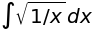

In [ ]:
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

# try it out:
import sympy
sympy.init_printing()
x = sympy.symbols('x')
sympy.Integral(sympy.sqrt(1 / x), x)

Jupyter and colab

In [ ]:
#infinite loop for gettin Colab RAM-upgrade
a=[]
while 1:
  a.append('1')

In [ ]:
# display all outputs in Jupyter, not only last result
# The difference between 'last' and 'last_expr': if your cell ends with, say, a loop containing an expression, 'last' will show you the results from that expression in each iteration of the loop. 'last_expr' (the default) won't show that: it will only display the result of a bare expression at the end of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # all none last last_expr

In [ ]:
# Multi-line printing without "\n"
print(
  f'\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%'
  f'\tValid prec: {valid_prec:.3f} | Valid rec: {valid_rec:.3f} | Valid f1: {valid_f1:.3f}'   
)

In [ ]:
# current jupyter running
!conda env list
!jupyter --version
system("jupyter" "notebook" "list")
!pip list

In [1]:

from IPython.display import display, HTML, Markdown
display(Markdown("#**-->FINAL REPORT**:"))
display(Markdown("##**-->FINAL REPORT**:"))
display(Markdown("###**-->FINAL REPORT**:"))
display(Markdown("####**-->FINAL REPORT**:"))
display(Markdown("####**-->FINAL REPORT**:"))
display(Markdown("**-->FINAL REPORT (no heading)**:"))
display(Markdown("#####**-->FINAL REPORT**:"))

display(Markdown(""" - [x] Write the press release \n - [x] Write the press release"""))

display(Markdown("""
http://www.example.com
foo <font color='red'>bar</font> foo
"""))

#**-->FINAL REPORT**:

##**-->FINAL REPORT**:

###**-->FINAL REPORT**:

####**-->FINAL REPORT**:

####**-->FINAL REPORT**:

**-->FINAL REPORT (no heading)**:

#####**-->FINAL REPORT**:

 - [x] Write the press release 
 - [x] Write the press release


http://www.example.com
foo <font color='red'>bar</font> foo


In [ ]:
!pip install gpustat

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=61f6ca65365c1706ec789b12faa6087088403152775fc245a13750286c2c5da1
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff20687e3bad6867d63155dbde5a7c10f4293
Successfully built gpustat


In [ ]:
def throw_party(host, *guests):
    print(host, 'is throwing a party!')
    for guest in guests:
        print(guest, 'has arrived.')
throw_party('Anika', 'Jethrow', 'Roxanne', 'Sadiyah', 'Andrei')

Anika is throwing a party!
Jethrow has arrived.
Roxanne has arrived.
Sadiyah has arrived.
Andrei has arrived.
